# Modelo de inteligência artificial que reconhece digito escrito a mão

Importando as bibliotecas

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from mss import mss
from PIL import Image
import cv2
from time import sleep
from IPython.display import clear_output

Carregando modelo já treinado

In [3]:
model = tf.keras.models.load_model('handwritten.model')

Inicializando o modelo

In [4]:
img = cv2.imread(f"digit1.png")[:,:,0]
img = np.invert(np.array([img]))

prediction = model.predict(img)
print(np.argmax(prediction))

1/1 [==============================] - 12s 12s/step
7


1/1 [==============================] - 0s 21ms/step


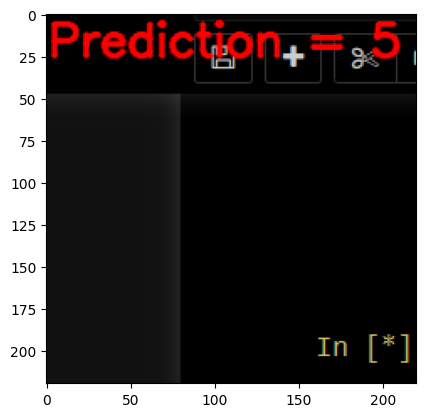

In [17]:
# Posição da tela que ira ser capturada e tamanho da janela
scrn = {'left': 160, 'top': 160, 'width': 220, 'height': 220}


with mss() as sct:
    while True:
        # Cria a janela com as devidas proporções
        screenShot = sct.grab(scrn)
        img = Image.frombytes(
            'RGB', 
        (screenShot.width, screenShot.height), 
        screenShot.rgb)
        cv2.imshow('Janela', np.array(img))
        # Salva a imagem capturada pela a janela e inverte as cores
        cv2.imwrite('imagem.png', np.invert(np.array(img)))
        # Salva a imagem em forma de array em uma variável com as cores invertidas
        imgm = (np.invert(np.array(img)))
        # Muda a dimensão da imagem para se encaixar no modelo
        new_image = cv2.resize(imgm, (28, 28))[:,:,0]
        # Usa o modelo para tentar prever qual o número certo
        prediction = model.predict(new_image)
        # Plota a imagem com o resultado escrito
        imagem = cv2.imread('imagem.png')
        image = cv2.putText(np.array(imagem), (f'Prediction = {np.argmax(prediction)}'), (1,25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2, cv2.LINE_AA)
        plt.imshow(image) 
        plt.show()
        #limpa o output a cada 2 segundos
        sleep(2)
        clear_output(wait=True)
        #Se pressionar a tecla "ESC" o processo será fechado
        if cv2.waitKey(1)==27:
            break
cv2.destroyAllWindows()